In [1]:
import pandas as pd
import datetime as dt
from datetime import date
import matplotlib.pyplot as plt
import yfinance as yf
import numpy as np
import tensorflow as tf

In [2]:
START = "2020-01-01"
TODAY = date.today().strftime("%Y-%m-%d")

# Define a function to load dataset

def load_data(ticker):
  data = yf.download(ticker, START, TODAY)
  data.reset_index(inplace=True)
  return data

In [47]:
data = load_data("AMZN")
df = data
df.head()

[*********************100%***********************]  1 of 1 completed


Price,Date,Adj Close,Close,High,Low,Open,Volume
Ticker,,AMZN,AMZN,AMZN,AMZN,AMZN,AMZN
0,2020-01-02 00:00:00+00:00,94.900497,94.900497,94.900497,93.207497,93.750000,80580000
1,2020-01-03 00:00:00+00:00,93.748497,93.748497,94.309998,93.224998,93.224998,75288000
2,2020-01-06 00:00:00+00:00,95.143997,95.143997,95.184502,93.000000,93.000000,81236000
3,2020-01-07 00:00:00+00:00,95.343002,95.343002,95.694504,94.601997,95.224998,80898000
4,2020-01-08 00:00:00+00:00,94.598503,94.598503,95.550003,94.321999,94.902000,70160000


In [48]:
for index, column in enumerate(df.columns):
    print(f"{index}: {column}")

0: ('Date', '')
1: ('Adj Close', 'AMZN')
2: ('Close', 'AMZN')
3: ('High', 'AMZN')
4: ('Low', 'AMZN')
5: ('Open', 'AMZN')
6: ('Volume', 'AMZN')


In [49]:
df = df.drop(['Date', 'Adj Close'], axis=1)
df.head()

C:\Users\muham\AppData\Local\Temp\ipykernel_896\4261181942.py:1: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  df = df.drop(['Date', 'Adj Close'], axis=1)


Price,Close,High,Low,Open,Volume
Ticker,AMZN,AMZN,AMZN,AMZN,AMZN
0,94.900497,94.900497,93.207497,93.750000,80580000
1,93.748497,94.309998,93.224998,93.224998,75288000
2,95.143997,95.184502,93.000000,93.000000,81236000
3,95.343002,95.694504,94.601997,95.224998,80898000
4,94.598503,95.550003,94.321999,94.902000,70160000


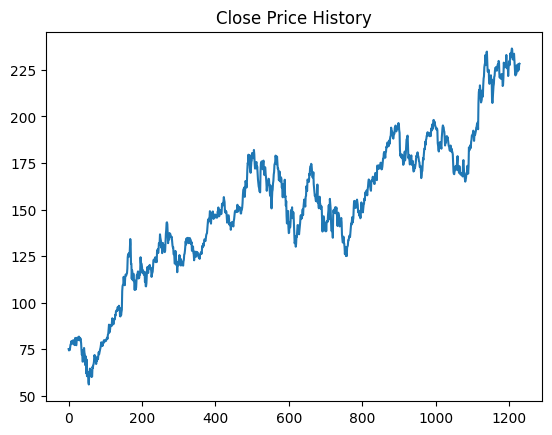

In [6]:
plt.title('Close Price History')
plt.plot(df['Close'])

In [50]:
for index, column in enumerate(df.columns):
    print(f"{index}: {column}")

0: ('Close', 'AMZN')
1: ('High', 'AMZN')
2: ('Low', 'AMZN')
3: ('Open', 'AMZN')
4: ('Volume', 'AMZN')


In [51]:
ma100 = df.Close.rolling(100).mean()
ma100

Ticker,AMZN
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
1225,185.9391
1226,186.1905
1227,186.2805
1228,186.3190


Text(0.5, 1.0, 'Graph of moving averages of 100 days')

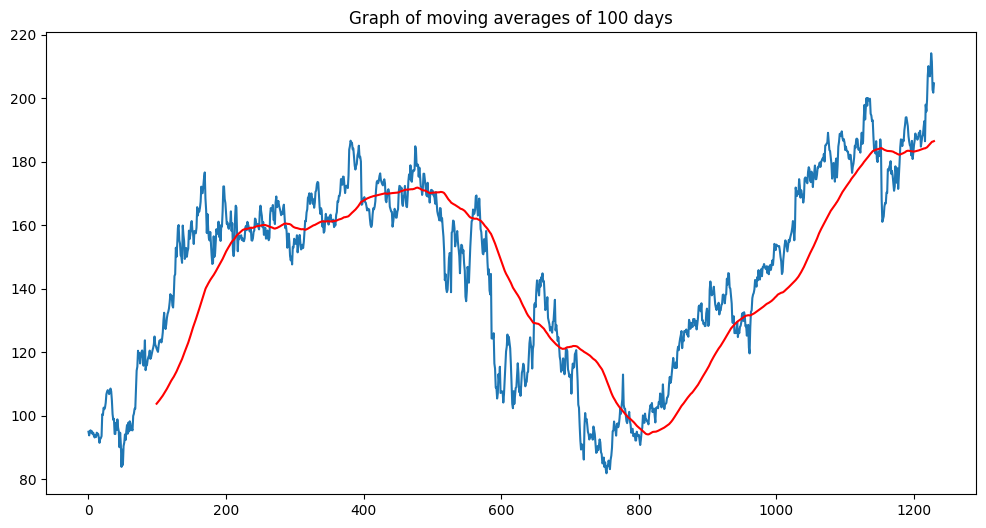

In [52]:
plt.figure(figsize=(12, 6))
plt.plot(df.Close)
plt.plot(ma100, 'r')
plt.title('Graph of moving averages of 100 days')

In [53]:
ma200 = df.Close.rolling(200).mean()
ma200

Ticker,AMZN
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
1225,182.53935
1226,182.82075
1227,183.03740
1228,183.18685


Text(0.5, 1.0, 'Comparision Of 100 Days And 200 Days Moving Averages')

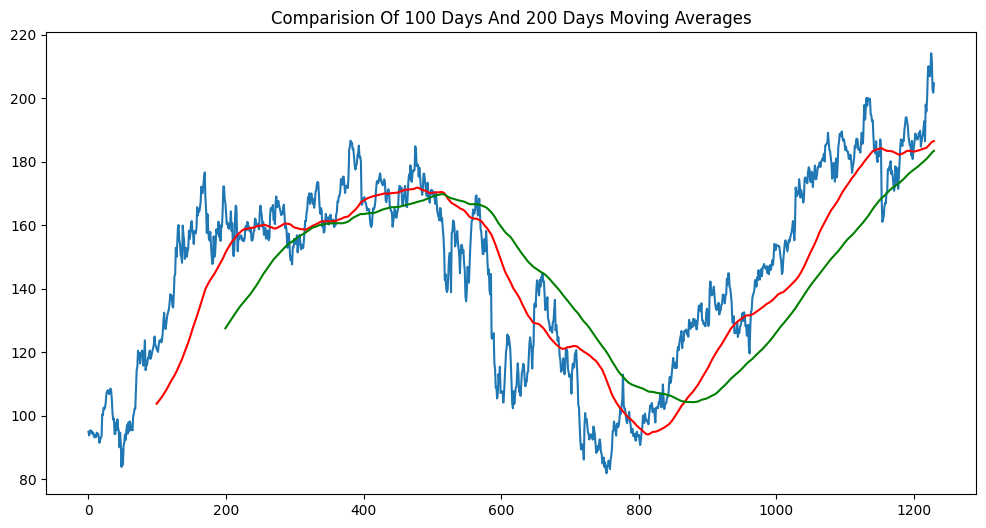

In [54]:
plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.plot(ma100, 'r')
plt.plot(ma200, 'g')
plt.title('Comparision Of 100 Days And 200 Days Moving Averages')

In [55]:
df.shape

(1230, 5)

In [56]:
# Splitting data into training and testing

train = pd.DataFrame(data[0:int(len(data)*0.70)])
test = pd.DataFrame(data[int(len(data)*0.70): int(len(data))])

print(train.shape)
print(test.shape)

(861, 7)
(369, 7)


In [57]:
train.head()

Price,Date,Adj Close,Close,High,Low,Open,Volume
Ticker,,AMZN,AMZN,AMZN,AMZN,AMZN,AMZN
0,2020-01-02 00:00:00+00:00,94.900497,94.900497,94.900497,93.207497,93.750000,80580000
1,2020-01-03 00:00:00+00:00,93.748497,93.748497,94.309998,93.224998,93.224998,75288000
2,2020-01-06 00:00:00+00:00,95.143997,95.143997,95.184502,93.000000,93.000000,81236000
3,2020-01-07 00:00:00+00:00,95.343002,95.343002,95.694504,94.601997,95.224998,80898000
4,2020-01-08 00:00:00+00:00,94.598503,94.598503,95.550003,94.321999,94.902000,70160000


In [58]:
test.head()

Price,Date,Adj Close,Close,High,Low,Open,Volume
Ticker,,AMZN,AMZN,AMZN,AMZN,AMZN,AMZN
861,2023-06-05 00:00:00+00:00,125.300003,125.300003,125.800003,123.029999,123.360001,47950100
862,2023-06-06 00:00:00+00:00,126.610001,126.610001,127.400002,125.000000,125.070000,45695200
863,2023-06-07 00:00:00+00:00,121.230003,121.230003,127.370003,120.629997,127.010002,95663300
864,2023-06-08 00:00:00+00:00,124.250000,124.250000,125.629997,122.260002,123.010002,62159300
865,2023-06-09 00:00:00+00:00,123.430000,123.430000,125.800003,123.190002,124.080002,51330000


In [60]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [61]:
train_close = train.iloc[:, 1:2].values  # Using 'Adj Close' column
test_close = test.iloc[:, 1:2].values  # Using 'Adj Close' column

In [62]:
data_training_array = scaler.fit_transform(train_close)
data_training_array

array([[0.1248729 ],
       [0.11387533],
       [0.12719746],
       [0.12909727],
       [0.12198991],
       [0.12632397],
       [0.11778462],
       [0.12167009],
       [0.11123575],
       [0.10769398],
       [0.11529304],
       [0.10898278],
       [0.12200418],
       [0.11983715],
       [0.11846241],
       [0.10751263],
       [0.09161771],
       [0.10350785],
       [0.10577517],
       [0.1118276 ],
       [0.17771751],
       [0.17556002],
       [0.19726396],
       [0.1925862 ],
       [0.19753126],
       [0.21139754],
       [0.23747385],
       [0.24553584],
       [0.24992722],
       [0.24509192],
       [0.23793205],
       [0.24786041],
       [0.25480549],
       [0.24663367],
       [0.21936412],
       [0.17798962],
       [0.16054341],
       [0.16381307],
       [0.11832876],
       [0.11806627],
       [0.15157448],
       [0.13011396],
       [0.16201829],
       [0.13729291],
       [0.12634305],
       [0.07838152],
       [0.12191831],
       [0.088

In [63]:
x_train = []
y_train = []

for i in range(100, data_training_array.shape[0]):
  x_train.append(data_training_array[i-100: i])
  y_train.append(data_training_array[i, 0])

x_train, y_train = np.array(x_train), np.array(y_train)

In [64]:
x_train.shape

(761, 100, 1)

In [65]:
from tensorflow.keras.layers import Dense, Dropout, LSTM
from tensorflow.keras.models import Sequential

In [66]:
model = Sequential()
model.add(LSTM(units = 50, activation = 'relu', return_sequences=True
              ,input_shape = (x_train.shape[1], 1)))
model.add(Dropout(0.2))

c:\Users\muham\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [68]:
model.add(LSTM(units = 60, activation = 'relu', return_sequences=True))
model.add(Dropout(0.3))

In [69]:
model.add(LSTM(units = 80, activation = 'relu', return_sequences=True))
model.add(Dropout(0.4))

In [70]:
model.add(LSTM(units = 120, activation = 'relu'))
model.add(Dropout(0.5))

In [71]:
model.add(Dense(units = 1))

In [72]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_4 (LSTM)                   │ (None, 100, 50)        │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 100, 50)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_5 (LSTM)                   │ (None, 100, 60)        │        26,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 100, 60)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_6 (LSTM)                   │ (None, 100, 60)        │        29,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 100, 60)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_7 (LSTM)                   │ (None, 100, 80)        │        45,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 100, 80)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_8 (LSTM)                   │ (None, 120)            │        96,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 120)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           121 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 207,801 (811.72 KB)

 Trainable params: 207,801 (811.72 KB)

 Non-trainable params: 0 (0.00 B)

In [73]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error', metrics = ['MAE'])
model.fit(x_train, y_train, epochs = 50)

Epoch 1/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 20s 263ms/step - MAE: 0.4202 - loss: 0.2528
Epoch 2/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 6s 242ms/step - MAE: 0.1782 - loss: 0.0464
Epoch 3/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 6s 231ms/step - MAE: 0.1356 - loss: 0.0290
Epoch 4/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 6s 228ms/step - MAE: 0.1262 - loss: 0.0264
Epoch 5/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 7s 295ms/step - MAE: 0.1121 - loss: 0.0214
Epoch 6/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 6s 230ms/step - MAE: 0.1096 - loss: 0.0197
Epoch 7/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 9s 358ms/step - MAE: 0.1142 - loss: 0.0201
Epoch 8/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 11s 458ms/step - MAE: 0.1179 - loss: 0.0225
Epoch 9/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 10s 406ms/step - MAE: 0.1015 - loss: 0.0172
Epoch 10/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 12s 489ms/step - MAE: 0.1055 - loss: 0.0191
Epoch 11/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 10s 419ms/step - MAE: 0.0985 - loss: 0.0177
Epoch 12/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 10s 407ms/step - MAE: 0.1014 - loss: 0.0173
Epoch 13/50
24/24 ━

In [74]:
model.save('AMZN_LSTM_model.keras')

In [75]:
test_close.shape
test_close

array([[125.30000305],
       [126.61000061],
       [121.23000336],
       [124.25      ],
       [123.43000031],
       [126.56999969],
       [126.66000366],
       [126.41999817],
       [127.11000061],
       [125.48999786],
       [125.77999878],
       [124.83000183],
       [130.1499939 ],
       [129.33000183],
       [127.33000183],
       [129.17999268],
       [129.03999329],
       [127.90000153],
       [130.36000061],
       [130.22000122],
       [130.38000488],
       [128.36000061],
       [129.77999878],
       [127.12999725],
       [128.77999878],
       [130.80000305],
       [134.30000305],
       [134.67999268],
       [133.55999756],
       [132.83000183],
       [135.36000061],
       [129.96000671],
       [130.        ],
       [128.80000305],
       [129.13000488],
       [128.1499939 ],
       [128.25      ],
       [132.21000671],
       [133.67999268],
       [131.69000244],
       [128.21000671],
       [128.91000366],
       [139.57000732],
       [142

In [76]:
past_100_days = pd.DataFrame(train_close[-100:])

In [77]:
test_df = pd.DataFrame(test_close)

In [78]:
final_df = pd.concat([past_100_days, test_df], ignore_index=True)

In [79]:
final_df.head()

,0
0,89.870003
1,95.089996
2,95.269997
3,98.120003
4,96.050003


In [80]:
input_data = scaler.fit_transform(final_df)
input_data

array([[0.        ],
       [0.04201878],
       [0.04346771],
       [0.06640908],
       [0.04974644],
       [0.04499715],
       [0.0306689 ],
       [0.05940592],
       [0.06157928],
       [0.0519198 ],
       [0.05884245],
       [0.07526361],
       [0.09957333],
       [0.08596957],
       [0.10673746],
       [0.12299765],
       [0.18546245],
       [0.10883037],
       [0.09909037],
       [0.09852691],
       [0.08194478],
       [0.06737499],
       [0.06230377],
       [0.07783947],
       [0.07912738],
       [0.09087982],
       [0.06665056],
       [0.05900341],
       [0.03791354],
       [0.04765353],
       [0.04789501],
       [0.02921997],
       [0.03131288],
       [0.0350962 ],
       [0.01851401],
       [0.01819202],
       [0.0404894 ],
       [0.03123237],
       [0.02962248],
       [0.03260078],
       [0.01915799],
       [0.00692265],
       [0.02060692],
       [0.04032838],
       [0.05095383],
       [0.08186427],
       [0.07309019],
       [0.063

In [81]:
input_data.shape


(469, 1)

In [82]:
x_test = []
y_test = []
for i in range(100, input_data.shape[0]):
   x_test.append(input_data[i-100: i])
   y_test.append(input_data[i, 0])

In [83]:
x_test, y_test = np.array(x_test), np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(369, 100, 1)
(369,)


In [84]:
# Making predictions

y_pred = model.predict(x_test)

12/12 ━━━━━━━━━━━━━━━━━━━━ 4s 166ms/step


In [85]:
y_pred.shape

(369, 1)

In [86]:
y_test

array([0.28519681, 0.29574174, 0.252435  , 0.27674472, 0.27014406,
       0.29541975, 0.29614425, 0.2942123 , 0.29976654, 0.28672619,
       0.28906057, 0.28141349, 0.32423722, 0.31763663, 0.30153746,
       0.31642911, 0.31530218, 0.30612572, 0.32592769, 0.32480075,
       0.32608871, 0.30982852, 0.32125891, 0.2999275 , 0.31320933,
       0.32946953, 0.35764307, 0.36070183, 0.35168634, 0.34581017,
       0.36617561, 0.3227079 , 0.32302983, 0.31337036, 0.31602673,
       0.30813805, 0.30894306, 0.34081947, 0.35265225, 0.33663365,
       0.30862113, 0.31425581, 0.40006442, 0.42139577, 0.40304273,
       0.38621913, 0.39193426, 0.39072687, 0.40811401, 0.38477014,
       0.36384129, 0.35506715, 0.34894951, 0.36070183, 0.35724057,
       0.36746358, 0.33784104, 0.34927144, 0.34830553, 0.36255333,
       0.36384129, 0.38750697, 0.38839243, 0.38155035, 0.36617561,
       0.38621913, 0.38927789, 0.42847945, 0.41342664, 0.44256622,
       0.44151974, 0.40666502, 0.40336466, 0.38444821, 0.36561

In [87]:
y_pred

array([[0.15925959],
       [0.16277428],
       [0.16799378],
       [0.17526032],
       [0.18457152],
       [0.19497208],
       [0.20571133],
       [0.21627185],
       [0.22648975],
       [0.23635438],
       [0.24563582],
       [0.2539357 ],
       [0.26082072],
       [0.26676017],
       [0.27242398],
       [0.27801675],
       [0.2835816 ],
       [0.28903735],
       [0.2938556 ],
       [0.2980392 ],
       [0.30172932],
       [0.30503082],
       [0.3075049 ],
       [0.3089317 ],
       [0.3087808 ],
       [0.30699527],
       [0.3044005 ],
       [0.30263856],
       [0.30312645],
       [0.30610436],
       [0.31071877],
       [0.3162281 ],
       [0.32091913],
       [0.3230725 ],
       [0.32150942],
       [0.31606483],
       [0.30745196],
       [0.2968182 ],
       [0.28638136],
       [0.27864268],
       [0.2748695 ],
       [0.27442315],
       [0.2759397 ],
       [0.2796641 ],
       [0.2860949 ],
       [0.2948532 ],
       [0.30510774],
       [0.315

In [88]:
scaler.scale_

array([0.00804959])

In [89]:
scale_factor = 1/0.00985902
y_pred = y_pred * scale_factor
y_test = y_test * scale_factor

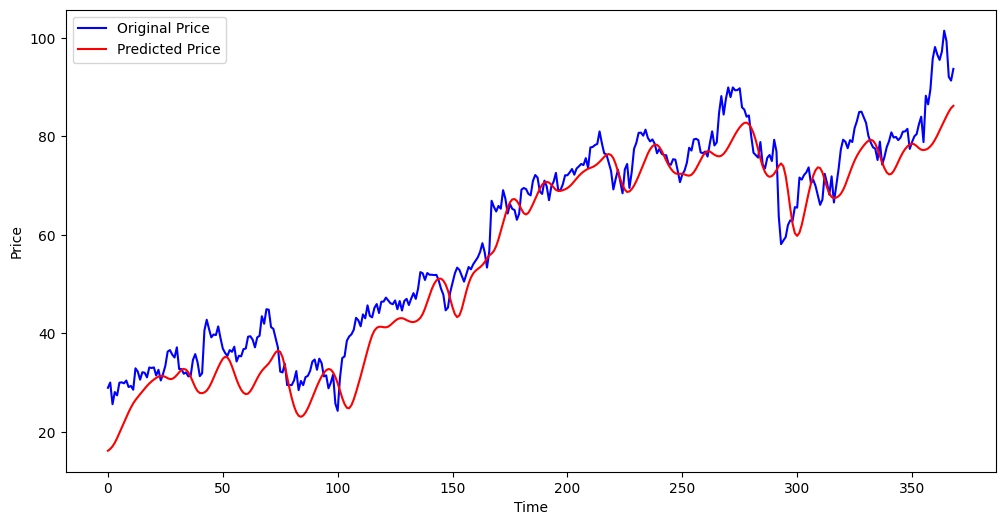

In [90]:
plt.figure(figsize = (12,6))
plt.plot(y_test, 'b', label = "Original Price")
plt.plot(y_pred, 'r', label = "Predicted Price")
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

In [91]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, y_pred)
print("Mean absolute error on test set: ", mae)

Mean absolute error on test set:  4.956192556012538
